timestamp	current_position	total_rotations	delta	speed
1721768998.07992	11207	1.38092041015625	768	0.748092174530029
1721768998.18047	11957	1.42669677734375	750	0.730558753013611
1721768998.2809	12622	1.46728515625	665	0.64776211977005
1721768998.38057	13337	1.51092529296875	715	0.696466028690338
1721768998.48224	14077	1.55609130859375	740	0.720817983150482
1721768998.58168	14834	1.602294921875	757	0.737377345561981
1721768998.68098	15624	1.6505126953125	790	0.76952189207077
1721768998.78165	6563	2.09747314453125	7323	7.13317584991455
1721768998.88102	810	1.746337890625	-5753	-5.60387277603149
1721768998.98156	1605	1.79486083984375	795	0.774392306804657
1721768999.0821	2404	1.8436279296875	799	0.77828860282898
1721768999.18157	3208	1.8927001953125	804	0.783159017562866
1721768999.282	4019	1.94219970703125	811	0.789977550506592
1721768999.38272	4778	1.988525390625	759	0.73932546377182

Note the data above considering the 'speed' data.  Note the average speed before the 'current_position' becomes 6563.  I postulate the value 6563 is an error.  Given the rotational sensor is a 14 bit sensor, what value should the sensor have provided to maintain the average speed?  Attached is the program that calculated the original speed so you can see the logic (e.g. TICKS_PER_REVOLUTION and WHEEL_CIRCUMFERENCE).

In [1]:
import pandas as pd

# Provided constants
TICKS_PER_REVOLUTION = 16384.0
WHEEL_CIRCUMFERENCE = 1.59593
OUTPUT_INTERVAL = 100  # milliseconds

# Create a DataFrame with the provided data
data = {
    'timestamp': [1721768998.07992, 1721768998.18047, 1721768998.2809, 1721768998.38057, 1721768998.48224, 1721768998.58168, 1721768998.68098],
    'current_position': [11207, 11957, 12622, 13337, 14077, 14834, 15624],
    'total_rotations': [1.38092041015625, 1.42669677734375, 1.46728515625, 1.51092529296875, 1.55609130859375, 1.602294921875, 1.6505126953125],
    'delta': [768, 750, 665, 715, 740, 757, 790],
    'speed': [0.748092174530029, 0.730558753013611, 0.64776211977005, 0.696466028690338, 0.720817983150482, 0.737377345561981, 0.76952189207077]
}

df = pd.DataFrame(data)

# Calculate the average speed before the anomaly
average_speed = df['speed'].mean()
print(f"Average speed before anomaly: {average_speed}")

# Calculate the delta that would result in the average speed
required_rotations_per_second = average_speed / WHEEL_CIRCUMFERENCE
required_delta = required_rotations_per_second * TICKS_PER_REVOLUTION * (OUTPUT_INTERVAL / 1000.0)

print(f"Required delta to maintain average speed: {required_delta}")

# Calculate the expected current position based on the required delta
last_position = df.iloc[-1]['current_position']
expected_position = (last_position + required_delta) % TICKS_PER_REVOLUTION
print(f"Expected current position to maintain average speed: {expected_position}")


Average speed before anomaly: 0.7215137566838946
Required delta to maintain average speed: 740.7142787909827
Expected current position to maintain average speed: 16364.714278790983


Calculate Average Speed: Calculate the average speed before the anomaly.

Calculate Required Delta: Calculate the delta value that would maintain the average speed.

Calculate Expected Position: Calculate the expected current_position based on the required delta and the last known position.

Simulate Next Reading: Simulate the next sensor reading of 810.

Calculate New Speed: Calculate the new speed value using the corrected sensor reading and the simulated next reading.

In [2]:
import pandas as pd

# Provided constants
TICKS_PER_REVOLUTION = 16384.0
WHEEL_CIRCUMFERENCE = 1.59593
OUTPUT_INTERVAL = 100  # milliseconds

# Create a DataFrame with the provided data
data = {
    'timestamp': [1721768998.07992, 1721768998.18047, 1721768998.2809, 1721768998.38057, 1721768998.48224, 1721768998.58168, 1721768998.68098],
    'current_position': [11207, 11957, 12622, 13337, 14077, 14834, 15624],
    'total_rotations': [1.38092041015625, 1.42669677734375, 1.46728515625, 1.51092529296875, 1.55609130859375, 1.602294921875, 1.6505126953125],
    'delta': [768, 750, 665, 715, 740, 757, 790],
    'speed': [0.748092174530029, 0.730558753013611, 0.64776211977005, 0.696466028690338, 0.720817983150482, 0.737377345561981, 0.76952189207077]
}

df = pd.DataFrame(data)

# Calculate the average speed before the anomaly
average_speed = df['speed'].mean()
print(f"Average speed before anomaly: {average_speed}")

# Calculate the delta that would result in the average speed
required_rotations_per_second = average_speed / WHEEL_CIRCUMFERENCE
required_delta = required_rotations_per_second * TICKS_PER_REVOLUTION * (OUTPUT_INTERVAL / 1000.0)
required_delta = round(required_delta)
print(f"Required delta to maintain average speed: {required_delta}")

# Calculate the expected current position based on the required delta
last_position = df.iloc[-1]['current_position']
expected_position = (last_position + required_delta) % TICKS_PER_REVOLUTION
print(f"Expected current position to maintain average speed: {expected_position}")

# Simulated next sensor reading
next_sensor_reading = 810

# Calculate delta using the corrected sensor reading for previous position and 810 for the current position
simulated_delta = (next_sensor_reading - expected_position + TICKS_PER_REVOLUTION) % TICKS_PER_REVOLUTION
if simulated_delta > TICKS_PER_REVOLUTION / 2:
    simulated_delta -= TICKS_PER_REVOLUTION

# Calculate the new speed value
new_rotations_per_second = simulated_delta / TICKS_PER_REVOLUTION * (1000.0 / OUTPUT_INTERVAL)
new_speed = new_rotations_per_second * WHEEL_CIRCUMFERENCE

print(f"Simulated delta: {simulated_delta}")
print(f"New speed value: {new_speed}")


Average speed before anomaly: 0.7215137566838946
Required delta to maintain average speed: 741
Expected current position to maintain average speed: 16365.0
Simulated delta: 829.0
New speed value: 0.8075109680175782


In [10]:
import pandas as pd
import numpy as np

# Provided constants
TICKS_PER_REVOLUTION = 16384.0
WHEEL_CIRCUMFERENCE = 1.59593
OUTPUT_INTERVAL = 100  # milliseconds

# Define the file paths
original_file_path = '/home/tractor/wheel_data_right.csv'
output_corrected_file_path = '/home/tractor/wheel_data_right_corrected.csv'

# Load the original data
df_original = pd.read_csv(original_file_path)

# Define the threshold values
threshold_prev_reading_3 = 15000
threshold_prev_reading_2 = 13000

# Function to capture previous three and next three position values
def capture_surrounding_values(df):
    results = []
    for i in range(len(df)):
        current_position = df.loc[i, 'current_position']
        previous_readings = df.loc[max(i-3, 0):i-1, 'current_position'].values
        next_readings = df.loc[i+1:i+3, 'current_position'].values
        
        # Ensure we capture exactly three values for previous and next readings
        previous_readings = [None]*(3-len(previous_readings)) + list(previous_readings)
        next_readings = list(next_readings) + [None]*(3-len(next_readings))
        
        results.append((i, current_position, previous_readings, next_readings))
    
    return results

# Function to detect forward motion sensor errors
def detect_fwd_errors(df_surrounding):
    errors = df_surrounding[
        (df_surrounding['Previous Reading 3'] > threshold_prev_reading_3) &
        (df_surrounding['Previous Reading 2'] > threshold_prev_reading_2) &
        (df_surrounding['Previous Reading 3'] > df_surrounding['Previous Reading 2']) &
        (df_surrounding['Previous Reading 2'] > df_surrounding['Previous Reading 1']) &
        (df_surrounding['Current Position'] > 2000) &
        (df_surrounding['Current Position'] < df_surrounding['Previous Reading 3'])
    ]
    return errors

# Function to correct forward motion sensor errors
def correct_fwd_errors(df, errors):
    corrected_positions = df['current_position'].copy()
    corrected_speeds = df['speed'].copy()
    error_indices = errors['Index'].tolist()
    
    corrected_count = 0
    for idx in error_indices:
        if idx < 3 or idx >= len(df) - 3:
            continue
        
        # Calculate the average speed before the anomaly
        avg_speed = df.iloc[idx-3:idx]['speed'].mean()
        print('avg_speed', avg_speed)
        
        # Calculate the delta that would result in the average speed
        required_rotations_per_second = avg_speed / WHEEL_CIRCUMFERENCE
        required_delta = required_rotations_per_second * TICKS_PER_REVOLUTION * (OUTPUT_INTERVAL / 1000.0)
        required_delta = round(required_delta)
        
        # Calculate the expected current position based on the required delta
        last_position = df.iloc[idx-1]['current_position']
        expected_position = (last_position + required_delta) % TICKS_PER_REVOLUTION
        
        # Correct the current position
        corrected_positions[idx] = expected_position
        print('expected_position:', expected_position)
        
        # Simulated next sensor reading
        next_sensor_reading = df.iloc[idx+1]['current_position']
        
        # Calculate delta using the corrected sensor reading for previous position and next_sensor_reading
        simulated_delta = (next_sensor_reading - expected_position + TICKS_PER_REVOLUTION) % TICKS_PER_REVOLUTION
        if simulated_delta > TICKS_PER_REVOLUTION / 2:
            simulated_delta -= TICKS_PER_REVOLUTION
        
        # Calculate the new speed value
        new_rotations_per_second = simulated_delta / TICKS_PER_REVOLUTION * (1000.0 / OUTPUT_INTERVAL)
        new_speed = new_rotations_per_second * WHEEL_CIRCUMFERENCE
        
        # Correct the speed
        corrected_speeds[idx+1] = new_speed
        
        corrected_count += 1
        
        # Print the timestamp and index of the error
        error_timestamp = df.iloc[idx]['timestamp']
        time_delta = error_timestamp - df.iloc[0]['timestamp']
        print(f"Error detected at index {idx}, timestamp: {error_timestamp}, time delta: {time_delta} seconds")
    
    df['current_position'] = corrected_positions
    df['speed'] = corrected_speeds
    
    return df, corrected_count

# Capture the surrounding values
surrounding_values = capture_surrounding_values(df_original)

# Create a DataFrame for the results
surrounding_values_data = {
    'Index': [t[0] for t in surrounding_values],
    'Previous Reading 1': [t[2][0] for t in surrounding_values],
    'Previous Reading 2': [t[2][1] for t in surrounding_values],
    'Previous Reading 3': [t[2][2] for t in surrounding_values],
    'Current Position': [t[1] for t in surrounding_values],
    'Next Reading 1': [t[3][0] for t in surrounding_values],
    'Next Reading 2': [t[3][1] for t in surrounding_values],
    'Next Reading 3': [t[3][2] for t in surrounding_values]
}
df_surrounding_values = pd.DataFrame(surrounding_values_data)

# Detect forward motion sensor errors
errors = detect_fwd_errors(df_surrounding_values)

# Correct forward motion sensor errors
df_corrected, corrected_count = correct_fwd_errors(df_original, errors)

# Save the corrected data to a new CSV file
df_corrected.to_csv(output_corrected_file_path, index=False)
print(f"Corrected data saved to {output_corrected_file_path}")
print(f"Number of corrected errors: {corrected_count}")



avg_speed 0.7425724069277445
expected_position: 2.0
Error detected at index 1434, timestamp: 1721768998.7816494, time delta: 143.62779545783997 seconds
avg_speed 0.7828343113263448
expected_position: 97.0
Error detected at index 1455, timestamp: 1721769000.8856125, time delta: 145.73175859451294 seconds
avg_speed 1.1286321083704631
expected_position: 48.0
Error detected at index 1509, timestamp: 1721769006.293924, time delta: 151.14007019996643 seconds
avg_speed 1.0922665198644002
expected_position: 69.0
Error detected at index 1524, timestamp: 1721769007.7966902, time delta: 152.64283633232117 seconds
avg_speed 1.0302501916885376
expected_position: 16229.0
Error detected at index 1602, timestamp: 1721769015.609926, time delta: 160.45607209205627 seconds
avg_speed 0.9964821736017863
expected_position: 323.0
Error detected at index 1784, timestamp: 1721769033.8418772, time delta: 178.68802332878113 seconds
avg_speed 0.2016342182954152
expected_position: 20.0
Error detected at index 1942

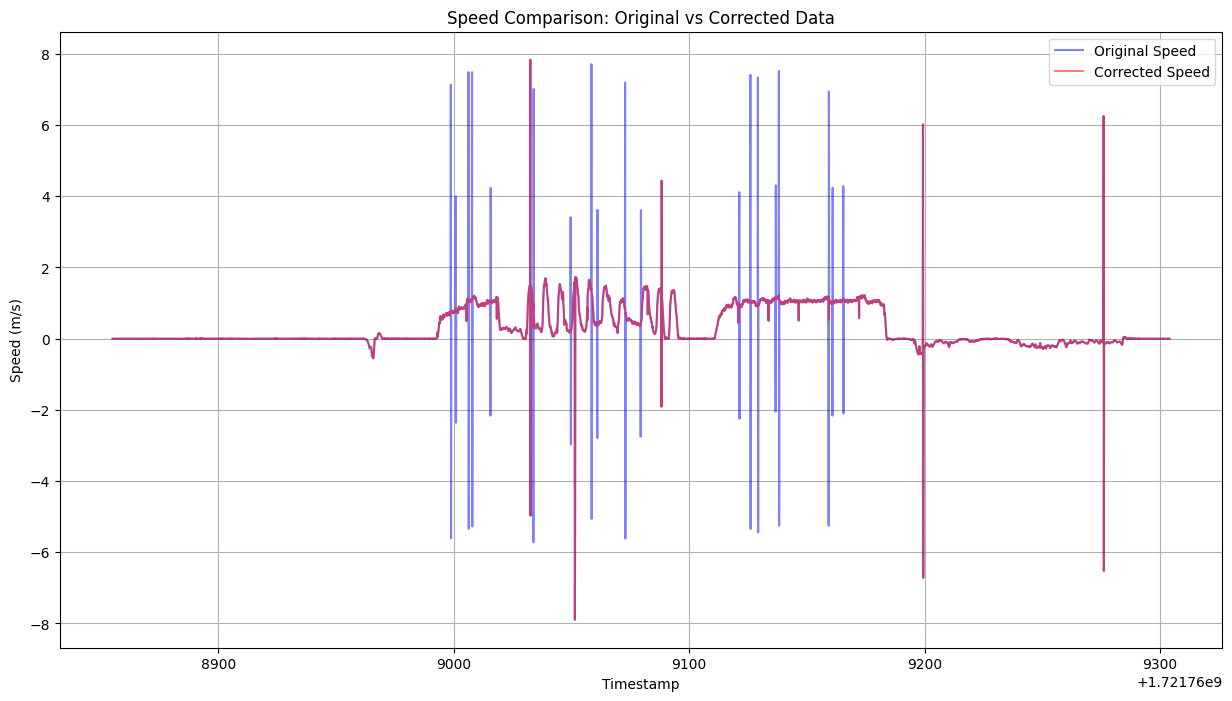

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths
original_file_path = '/home/tractor/wheel_data_right.csv'
corrected_file_path = '/home/tractor/wheel_data_right_corrected.csv'

# Load the data
df_original = pd.read_csv(original_file_path)
df_corrected = pd.read_csv(corrected_file_path)

# Plot the speed from both datasets
plt.figure(figsize=(15, 8))

plt.plot(df_original['timestamp'], df_original['speed'], label='Original Speed', color='blue', alpha=0.5)
plt.plot(df_corrected['timestamp'], df_corrected['speed'], label='Corrected Speed', color='red', alpha=0.5)

plt.xlabel('Timestamp')
plt.ylabel('Speed (m/s)')
plt.title('Speed Comparison: Original vs Corrected Data')
plt.legend()
plt.grid(True)
plt.show()


second version of code above


In [4]:
import pandas as pd
import numpy as np

# Provided constants
TICKS_PER_REVOLUTION = 16384.0
WHEEL_CIRCUMFERENCE = 1.59593
OUTPUT_INTERVAL = 100  # milliseconds

# Define the file paths
original_file_path = '/home/tractor/wheel_data_right.csv'
output_corrected_file_path = '/home/tractor/wheel_data_right_corrected.csv'

# Load the original data
df_original = pd.read_csv(original_file_path)

# Define the threshold values
threshold_prev_reading_3 = 15000
threshold_prev_reading_2 = 13000

# Function to capture previous three and next three position values
def capture_surrounding_values(df):
    results = []
    for i in range(len(df)):
        current_position = df.loc[i, 'current_position']
        previous_readings = df.loc[max(i-3, 0):i-1, 'current_position'].values
        next_readings = df.loc[i+1:i+3, 'current_position'].values
        
        # Ensure we capture exactly three values for previous and next readings
        previous_readings = [None]*(3-len(previous_readings)) + list(previous_readings)
        next_readings = list(next_readings) + [None]*(3-len(next_readings))
        
        results.append((i, current_position, previous_readings, next_readings))
    
    return results

# Function to detect forward motion sensor errors
def detect_fwd_errors(df_surrounding):
    errors = df_surrounding[
        (df_surrounding['Previous Reading 3'] > threshold_prev_reading_3) &
        (df_surrounding['Previous Reading 2'] > threshold_prev_reading_2) &
        (df_surrounding['Previous Reading 3'] > df_surrounding['Previous Reading 2']) &
        (df_surrounding['Previous Reading 2'] > df_surrounding['Previous Reading 1']) &
        (df_surrounding['Current Position'] > 2000) &
        (df_surrounding['Current Position'] < df_surrounding['Previous Reading 3'])
    ]
    return errors

# Function to correct forward motion sensor errors
def correct_fwd_errors(df, errors):
    corrected_positions = df['current_position'].copy()
    corrected_deltas = df['delta'].copy()
    corrected_speeds = df['speed'].copy()
    corrected_rotations = df['total_rotations'].copy()
    error_indices = errors['Index'].tolist()
    
    corrected_count = 0
    for idx in error_indices:
        if idx < 3 or idx >= len(df) - 3:
            continue
        
        # Calculate the average speed before the anomaly
        avg_speed = df.iloc[idx-3:idx]['speed'].mean()
        
        # Calculate the delta that would result in the average speed
        required_rotations_per_second = avg_speed / WHEEL_CIRCUMFERENCE
        required_delta = required_rotations_per_second * TICKS_PER_REVOLUTION * (OUTPUT_INTERVAL / 1000.0)
        required_delta = round(required_delta)
        
        # Calculate the expected current position based on the required delta
        last_position = df.iloc[idx-1]['current_position']
        expected_position = (last_position + required_delta) % TICKS_PER_REVOLUTION
        print(f"Required delta: {required_delta}, Expected position: {expected_position}")

        # Correct the current position
        corrected_positions[idx] = expected_position
        
        # Calculate delta using the corrected sensor reading for previous position and expected_position
        simulated_delta = (expected_position - last_position + TICKS_PER_REVOLUTION) % TICKS_PER_REVOLUTION
        if simulated_delta > TICKS_PER_REVOLUTION / 2:
            simulated_delta -= TICKS_PER_REVOLUTION
        
        corrected_deltas[idx] = simulated_delta
        
        # Calculate total rotations using the corrected sensor reading for previous position and expected_position
        corrected_rotations[idx] = df.iloc[idx-1]['total_rotations'] + simulated_delta / TICKS_PER_REVOLUTION
        
        # Simulated next sensor reading
        next_sensor_reading = df.iloc[idx+1]['current_position']
        
        # Calculate delta using the corrected sensor reading for previous position and next_sensor_reading
        simulated_delta = (next_sensor_reading - expected_position + TICKS_PER_REVOLUTION) % TICKS_PER_REVOLUTION
        if simulated_delta > TICKS_PER_REVOLUTION / 2:
            simulated_delta -= TICKS_PER_REVOLUTION
        
        # Calculate the new speed value
        new_rotations_per_second = simulated_delta / TICKS_PER_REVOLUTION * (1000.0 / OUTPUT_INTERVAL)
        new_speed = new_rotations_per_second * WHEEL_CIRCUMFERENCE
        
        # Correct the speed and delta for the next record
        corrected_speeds[idx+1] = new_speed
        corrected_deltas[idx+1] = simulated_delta
        corrected_rotations[idx+1] = corrected_rotations[idx] + simulated_delta / TICKS_PER_REVOLUTION
        
        corrected_count += 1
        
        # Print the timestamp and index of the error
        error_timestamp = df.iloc[idx]['timestamp']
        time_delta = error_timestamp - df.iloc[0]['timestamp']
        print(f"Error detected at index {idx}, timestamp: {error_timestamp}, time delta: {time_delta} seconds")
    
    df['current_position'] = corrected_positions
    df['delta'] = corrected_deltas
    df['speed'] = corrected_speeds
    df['total_rotations'] = corrected_rotations
    
    return df, corrected_count

# Capture the surrounding values
surrounding_values = capture_surrounding_values(df_original)

# Create a DataFrame for the results
surrounding_values_data = {
    'Index': [t[0] for t in surrounding_values],
    'Previous Reading 1': [t[2][0] for t in surrounding_values],
    'Previous Reading 2': [t[2][1] for t in surrounding_values],
    'Previous Reading 3': [t[2][2] for t in surrounding_values],
    'Current Position': [t[1] for t in surrounding_values],
    'Next Reading 1': [t[3][0] for t in surrounding_values],
    'Next Reading 2': [t[3][1] for t in surrounding_values],
    'Next Reading 3': [t[3][2] for t in surrounding_values]
}
df_surrounding_values = pd.DataFrame(surrounding_values_data)

# Detect forward motion sensor errors
errors = detect_fwd_errors(df_surrounding_values)

# Correct forward motion sensor errors
df_corrected, corrected_count = correct_fwd_errors(df_original, errors)

# Save the corrected data to a new CSV file
df_corrected.to_csv(output_corrected_file_path, index=False)
print(f"Corrected data saved to {output_corrected_file_path}")
print(f"Number of corrected errors: {corrected_count}")




Required delta: 762, Expected position: 2.0
Error detected at index 1434, timestamp: 1721768998.7816494, time delta: 143.62779545783997 seconds
Required delta: 804, Expected position: 97.0
Error detected at index 1455, timestamp: 1721769000.8856125, time delta: 145.73175859451294 seconds
Required delta: 1159, Expected position: 48.0
Error detected at index 1509, timestamp: 1721769006.293924, time delta: 151.14007019996643 seconds
Required delta: 1121, Expected position: 69.0
Error detected at index 1524, timestamp: 1721769007.7966902, time delta: 152.64283633232117 seconds
Required delta: 1058, Expected position: 16229.0
Error detected at index 1602, timestamp: 1721769015.609926, time delta: 160.45607209205627 seconds
Required delta: 1023, Expected position: 323.0
Error detected at index 1784, timestamp: 1721769033.8418772, time delta: 178.68802332878113 seconds
Required delta: 207, Expected position: 20.0
Error detected at index 1942, timestamp: 1721769049.6682456, time delta: 194.514

In [9]:
import pandas as pd
import numpy as np

# Provided constants
TICKS_PER_REVOLUTION = 16384.0
WHEEL_CIRCUMFERENCE = 1.59593
OUTPUT_INTERVAL = 100  # milliseconds

# Define the file paths
original_file_path = '/home/tractor/wheel_data_right.csv'
output_corrected_file_path = '/home/tractor/wheel_data_right_corrected.csv'

# Load the original data
df_original = pd.read_csv(original_file_path)

# Define the threshold values
threshold_prev_reading_3 = 15000
threshold_prev_reading_2 = 13000

# Function to capture previous three and next three position values
def capture_surrounding_values(df):
    results = []
    for i in range(len(df)):
        current_position = df.loc[i, 'current_position']
        previous_readings = df.loc[max(i-3, 0):i-1, 'current_position'].values
        next_readings = df.loc[i+1:i+3, 'current_position'].values
        
        # Ensure we capture exactly three values for previous and next readings
        previous_readings = [None]*(3-len(previous_readings)) + list(previous_readings)
        next_readings = list(next_readings) + [None]*(3-len(next_readings))
        
        results.append((i, current_position, previous_readings, next_readings))
    
    return results

# Function to detect forward motion sensor errors
def detect_fwd_errors(df_surrounding):
    errors = df_surrounding[
        (df_surrounding['Previous Reading 3'] > threshold_prev_reading_3) &
        (df_surrounding['Previous Reading 2'] > threshold_prev_reading_2) &
        (df_surrounding['Previous Reading 3'] > df_surrounding['Previous Reading 2']) &
        (df_surrounding['Previous Reading 2'] > df_surrounding['Previous Reading 1']) &
        (df_surrounding['Current Position'] > 2000) &
        (df_surrounding['Current Position'] < df_surrounding['Previous Reading 3'])
    ]
    return errors

# Function to correct forward motion sensor errors
def correct_fwd_errors(df, errors):
    corrected_positions = df['current_position'].copy()
    corrected_deltas = df['delta'].copy()
    corrected_speeds = df['speed'].copy()
    corrected_rotations = df['total_rotations'].copy()
    error_indices = errors['Index'].tolist()
    
    corrected_count = 0
    for idx in error_indices:
        if idx < 3 or idx >= len(df) - 3:
            continue
        
        # Calculate the average speed before the anomaly
        avg_speed = df.iloc[idx-3:idx]['speed'].mean()
        
        # Calculate the delta that would result in the average speed
        required_rotations_per_second = avg_speed / WHEEL_CIRCUMFERENCE
        required_delta = required_rotations_per_second * TICKS_PER_REVOLUTION * (OUTPUT_INTERVAL / 1000.0)
        required_delta = round(required_delta)
        
        # Calculate the expected current position based on the required delta
        last_position = df.iloc[idx-1]['current_position']
        expected_position = (last_position + required_delta) % TICKS_PER_REVOLUTION
        print(f"Required delta: {required_delta}, Expected position: {expected_position}")

        # Correct the current position
        corrected_positions[idx] = expected_position
        
        # Calculate delta using the corrected sensor reading for previous position and expected_position
        simulated_delta = (expected_position - last_position + TICKS_PER_REVOLUTION) % TICKS_PER_REVOLUTION
        if simulated_delta > TICKS_PER_REVOLUTION / 2:
            simulated_delta -= TICKS_PER_REVOLUTION
        
        corrected_deltas[idx] = simulated_delta
        
        # Calculate total rotations using the corrected sensor reading for previous position and expected_position
        corrected_rotations[idx] = df.iloc[idx-1]['total_rotations'] + simulated_delta / TICKS_PER_REVOLUTION
        
        # Calculate the new speed value for the corrected record
        rotations_per_second = simulated_delta / TICKS_PER_REVOLUTION * (1000.0 / OUTPUT_INTERVAL)
        corrected_speeds[idx] = rotations_per_second * WHEEL_CIRCUMFERENCE
        
        # Simulated next sensor reading
        next_sensor_reading = df.iloc[idx+1]['current_position']
        
        # Calculate delta using the corrected sensor reading for previous position and next_sensor_reading
        simulated_delta = (next_sensor_reading - expected_position + TICKS_PER_REVOLUTION) % TICKS_PER_REVOLUTION
        if simulated_delta > TICKS_PER_REVOLUTION / 2:
            simulated_delta -= TICKS_PER_REVOLUTION
        
        # Calculate the new speed value for the next record
        new_rotations_per_second = simulated_delta / TICKS_PER_REVOLUTION * (1000.0 / OUTPUT_INTERVAL)
        new_speed = new_rotations_per_second * WHEEL_CIRCUMFERENCE
        
        # Correct the speed and delta for the next record
        corrected_speeds[idx+1] = new_speed
        corrected_deltas[idx+1] = simulated_delta
        corrected_rotations[idx+1] = corrected_rotations[idx] + simulated_delta / TICKS_PER_REVOLUTION
        
        corrected_count += 1
        
        # Print the timestamp and index of the error
        error_timestamp = df.iloc[idx]['timestamp']
        time_delta = error_timestamp - df.iloc[0]['timestamp']
        print(f"Error detected at index {idx}, timestamp: {error_timestamp}, time delta: {time_delta} seconds")
    
    df['current_position'] = corrected_positions
    df['delta'] = corrected_deltas
    df['speed'] = corrected_speeds
    df['total_rotations'] = corrected_rotations
    
    return df, corrected_count

# Capture the surrounding values
surrounding_values = capture_surrounding_values(df_original)

# Create a DataFrame for the results
surrounding_values_data = {
    'Index': [t[0] for t in surrounding_values],
    'Previous Reading 1': [t[2][0] for t in surrounding_values],
    'Previous Reading 2': [t[2][1] for t in surrounding_values],
    'Previous Reading 3': [t[2][2] for t in surrounding_values],
    'Current Position': [t[1] for t in surrounding_values],
    'Next Reading 1': [t[3][0] for t in surrounding_values],
    'Next Reading 2': [t[3][1] for t in surrounding_values],
    'Next Reading 3': [t[3][2] for t in surrounding_values]
}
df_surrounding_values = pd.DataFrame(surrounding_values_data)

# Detect forward motion sensor errors
errors = detect_fwd_errors(df_surrounding_values)

# Correct forward motion sensor errors
df_corrected, corrected_count = correct_fwd_errors(df_original, errors)

# Save the corrected data to a new CSV file
df_corrected.to_csv(output_corrected_file_path, index=False)
print(f"Corrected data saved to {output_corrected_file_path}")
print(f"Number of corrected errors: {corrected_count}")


Required delta: 762, Expected position: 2.0
Error detected at index 1434, timestamp: 1721768998.7816494, time delta: 143.62779545783997 seconds
Required delta: 804, Expected position: 97.0
Error detected at index 1455, timestamp: 1721769000.8856125, time delta: 145.73175859451294 seconds
Required delta: 1159, Expected position: 48.0
Error detected at index 1509, timestamp: 1721769006.293924, time delta: 151.14007019996643 seconds
Required delta: 1121, Expected position: 69.0
Error detected at index 1524, timestamp: 1721769007.7966902, time delta: 152.64283633232117 seconds
Required delta: 1058, Expected position: 16229.0
Error detected at index 1602, timestamp: 1721769015.609926, time delta: 160.45607209205627 seconds
Required delta: 1023, Expected position: 323.0
Error detected at index 1784, timestamp: 1721769033.8418772, time delta: 178.68802332878113 seconds
Required delta: 207, Expected position: 20.0
Error detected at index 1942, timestamp: 1721769049.6682456, time delta: 194.514

In [8]:
import pandas as pd
import numpy as np

# Provided constants
TICKS_PER_REVOLUTION = 16384.0
WHEEL_CIRCUMFERENCE = 1.59593
OUTPUT_INTERVAL = 100  # milliseconds

# Define the file paths
original_file_path = '/home/tractor/wheel_data_right.csv'
output_corrected_file_path = '/home/tractor/wheel_data_right_corrected.csv'
output_surrounding_data_path = '/home/tractor/wheel_data_right_surrounding_data.csv'

# Load the original data
df_original = pd.read_csv(original_file_path)

# Define the threshold values
threshold_prev_reading_3 = 15000
threshold_prev_reading_2 = 13000

# Function to capture previous three and next three position values
def capture_surrounding_values(df):
    results = []
    for i in range(len(df)):
        current_position = df.loc[i, 'current_position']
        previous_readings = df.loc[max(i-3, 0):i-1, 'current_position'].values
        next_readings = df.loc[i+1:i+3, 'current_position'].values
        
        # Ensure we capture exactly three values for previous and next readings
        previous_readings = [None]*(3-len(previous_readings)) + list(previous_readings)
        next_readings = list(next_readings) + [None]*(3-len(next_readings))
        
        results.append((i, current_position, previous_readings, next_readings))
    
    return results

# Function to detect forward motion sensor errors
def detect_fwd_errors(df_surrounding):
    errors = df_surrounding[
        (df_surrounding['Previous Reading 3'] > threshold_prev_reading_3) &
        (df_surrounding['Previous Reading 2'] > threshold_prev_reading_2) &
        (df_surrounding['Previous Reading 3'] > df_surrounding['Previous Reading 2']) &
        (df_surrounding['Previous Reading 2'] > df_surrounding['Previous Reading 1']) &
        (df_surrounding['Current Position'] > 2000) &
        (df_surrounding['Current Position'] < df_surrounding['Previous Reading 3'])
    ]
    return errors

# Function to correct forward motion sensor errors
def correct_fwd_errors(df, errors):
    corrected_positions = df['current_position'].copy()
    corrected_deltas = df['delta'].copy()
    corrected_speeds = df['speed'].copy()
    corrected_rotations = df['total_rotations'].copy()
    error_indices = errors['Index'].tolist()
    
    surrounding_data = []

    corrected_count = 0
    for idx in error_indices:
        if idx < 3 or idx >= len(df) - 3:
            continue
        
        # Capture surrounding data
        surrounding_data.append({
            'Index': idx,
            'Previous Reading 3': df.loc[idx-3, 'current_position'] if idx-3 >= 0 else None,
            'Previous Reading 2': df.loc[idx-2, 'current_position'] if idx-2 >= 0 else None,
            'Previous Reading 1': df.loc[idx-1, 'current_position'] if idx-1 >= 0 else None,
            'Current Position': df.loc[idx, 'current_position'],
            'Next Reading 1': df.loc[idx+1, 'current_position'] if idx+1 < len(df) else None,
            'Next Reading 2': df.loc[idx+2, 'current_position'] if idx+2 < len(df) else None,
            'Next Reading 3': df.loc[idx+3, 'current_position'] if idx+3 < len(df) else None
        })
        
        # Calculate the average speed before the anomaly
        avg_speed = df.iloc[idx-3:idx]['speed'].mean()
        
        # Calculate the delta that would result in the average speed
        required_rotations_per_second = avg_speed / WHEEL_CIRCUMFERENCE
        required_delta = required_rotations_per_second * TICKS_PER_REVOLUTION * (OUTPUT_INTERVAL / 1000.0)
        required_delta = round(required_delta)
        
        # Calculate the expected current position based on the required delta
        last_position = df.iloc[idx-1]['current_position']
        expected_position = (last_position + required_delta) % TICKS_PER_REVOLUTION
        print(f"Required delta: {required_delta}, Expected position: {expected_position}")

        # Correct the current position
        corrected_positions[idx] = expected_position
        
        # Calculate delta using the corrected sensor reading for previous position and expected_position
        simulated_delta = (expected_position - last_position + TICKS_PER_REVOLUTION) % TICKS_PER_REVOLUTION
        if simulated_delta > TICKS_PER_REVOLUTION / 2:
            simulated_delta -= TICKS_PER_REVOLUTION
        
        corrected_deltas[idx] = simulated_delta
        
        # Calculate total rotations using the corrected sensor reading for previous position and expected_position
        corrected_rotations[idx] = df.iloc[idx-1]['total_rotations'] + simulated_delta / TICKS_PER_REVOLUTION
        
        # Simulated next sensor reading
        next_sensor_reading = df.iloc[idx+1]['current_position']
        
        # Calculate delta using the corrected sensor reading for previous position and next_sensor_reading
        simulated_delta = (next_sensor_reading - expected_position + TICKS_PER_REVOLUTION) % TICKS_PER_REVOLUTION
        if simulated_delta > TICKS_PER_REVOLUTION / 2:
            simulated_delta -= TICKS_PER_REVOLUTION
        
        # Calculate the new speed value
        new_rotations_per_second = simulated_delta / TICKS_PER_REVOLUTION * (1000.0 / OUTPUT_INTERVAL)
        new_speed = new_rotations_per_second * WHEEL_CIRCUMFERENCE
        
        # Correct the speed and delta for the next record
        corrected_speeds[idx+1] = new_speed
        corrected_deltas[idx+1] = simulated_delta
        corrected_rotations[idx+1] = corrected_rotations[idx] + simulated_delta / TICKS_PER_REVOLUTION
        
        corrected_count += 1
        
        # Print the timestamp and index of the error
        error_timestamp = df.iloc[idx]['timestamp']
        time_delta = error_timestamp - df.iloc[0]['timestamp']
        print(f"Error detected at index {idx}, timestamp: {error_timestamp}, time delta: {time_delta} seconds")
    
    df['current_position'] = corrected_positions
    df['delta'] = corrected_deltas
    df['speed'] = corrected_speeds
    df['total_rotations'] = corrected_rotations
    
    return df, corrected_count, pd.DataFrame(surrounding_data)

# Capture the surrounding values
surrounding_values = capture_surrounding_values(df_original)

# Create a DataFrame for the results
surrounding_values_data = {
    'Index': [t[0] for t in surrounding_values],
    'Previous Reading 1': [t[2][0] for t in surrounding_values],
    'Previous Reading 2': [t[2][1] for t in surrounding_values],
    'Previous Reading 3': [t[2][2] for t in surrounding_values],
    'Current Position': [t[1] for t in surrounding_values],
    'Next Reading 1': [t[3][0] for t in surrounding_values],
    'Next Reading 2': [t[3][1] for t in surrounding_values],
    'Next Reading 3': [t[3][2] for t in surrounding_values]
}
df_surrounding_values = pd.DataFrame(surrounding_values_data)

# Detect forward motion sensor errors
errors = detect_fwd_errors(df_surrounding_values)

# Correct forward motion sensor errors
df_corrected, corrected_count, df_surrounding_errors = correct_fwd_errors(df_original, errors)

# Save the corrected data to a new CSV file
df_corrected.to_csv(output_corrected_file_path, index=False)
print(f"Corrected data saved to {output_corrected_file_path}")

# Save the surrounding data to a new CSV file
df_surrounding_errors.to_csv(output_surrounding_data_path, index=False)
print(f"Surrounding data saved to {output_surrounding_data_path}")
print(f"Number of corrected errors: {corrected_count}")


Required delta: 762, Expected position: 2.0
Error detected at index 1434, timestamp: 1721768998.7816494, time delta: 143.62779545783997 seconds
Required delta: 804, Expected position: 97.0
Error detected at index 1455, timestamp: 1721769000.8856125, time delta: 145.73175859451294 seconds
Required delta: 1159, Expected position: 48.0
Error detected at index 1509, timestamp: 1721769006.293924, time delta: 151.14007019996643 seconds
Required delta: 1121, Expected position: 69.0
Error detected at index 1524, timestamp: 1721769007.7966902, time delta: 152.64283633232117 seconds
Required delta: 1058, Expected position: 16229.0
Error detected at index 1602, timestamp: 1721769015.609926, time delta: 160.45607209205627 seconds
Required delta: 1023, Expected position: 323.0
Error detected at index 1784, timestamp: 1721769033.8418772, time delta: 178.68802332878113 seconds
Required delta: 207, Expected position: 20.0
Error detected at index 1942, timestamp: 1721769049.6682456, time delta: 194.514